<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/Mini_Food_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2025-10-01 12:57:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   111MB/s    in 20s     

2025-10-01 12:58:13 (78.8 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [2]:
!wget https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-10-01 12:58:13--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-10-01 12:58:14 (90.1 MB/s) - ‘helper_functions.py’ saved [6733/6733]



In [3]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys,walk_through_dir,unzip_data

In [4]:
unzip_data('101_food_classes_10_percent.zip')

In [5]:
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/grilled_cheese_sandwich'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/beignets'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/apple_pie'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/croque_madame'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/bibimbap'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/fish_and_chips'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/carrot_cake'.
There are 0 directories and 250 imag

In [6]:
train_dir='101_food_classes_10_percent/train'
test_dir='101_food_classes_10_percent/test'

In [7]:
import tensorflow as tf

In [8]:
IMG_SIZE=(224,224)

In [9]:
train_all_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',image_size=IMG_SIZE,shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


Create a model checkpoint callback

In [10]:
chechpoint_path='101_food_all_data_10%_checkpoint.weights.h5'
check_point_callback=tf.keras.callbacks.ModelCheckpoint(chechpoint_path,save_weights_only=True,monitor='val_accuracy',save_best_only=True)

# **Create Data Augmentation Layer**

In [11]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing

In [12]:
data_augmentation=Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomRotation(0.2),
    # layers.Rescaling(1/255.)
],name='data_augmentation_layer')

In [13]:
# Setup base model
base_model=tf.keras.applications.EfficientNetB0(include_top=False,weights='imagenet')
base_model.trainable=False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
# Setup model architecture with trainable top layer
inputs=layers.Input(shape=(224,224,3),name='input_layer')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D(name='Global_Average_pooling_layer')(x)
outputs=layers.Dense(len(train_all_10_percent.class_names),activation='softmax',name='Output_layer')(x)

model=tf.keras.Model(inputs,outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_layer         │ (None, None, None, 3)  │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Global_Average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [15]:
# Compile and fit
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Model Training

In [16]:
history_all_classes_10_percent=model.fit(train_all_10_percent,epochs=5,validation_data=test_data,validation_steps=int(0.15*len(test_data)),callbacks=[check_point_callback])

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 54s 168ms/step - accuracy: 0.1667 - loss: 3.9197 - val_accuracy: 0.4457 - val_loss: 2.4803
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 36s 150ms/step - accuracy: 0.4916 - loss: 2.2399 - val_accuracy: 0.5093 - val_loss: 2.0185
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 42s 176ms/step - accuracy: 0.5686 - loss: 1.8357 - val_accuracy: 0.5336 - val_loss: 1.8466
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 76s 150ms/step - accuracy: 0.6110 - loss: 1.5977 - val_accuracy: 0.5461 - val_loss: 1.7763
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.6436 - loss: 1.4420 - val_accuracy: 0.5408 - val_loss: 1.7472


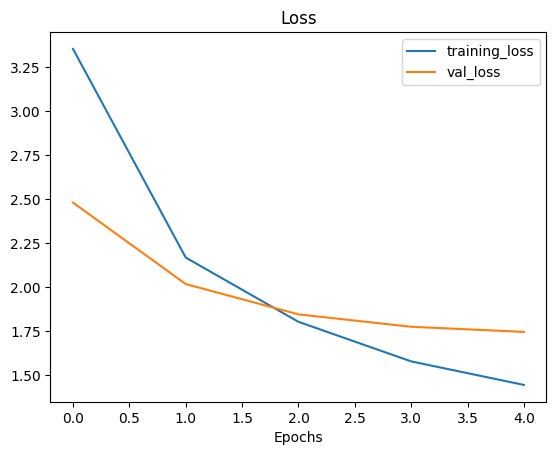

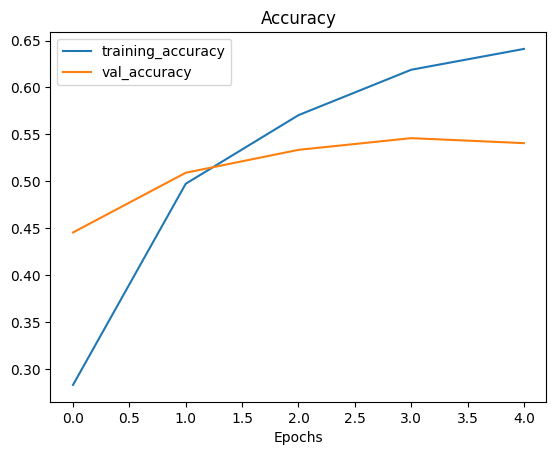

In [17]:
plot_loss_curves(history_all_classes_10_percent)

In [18]:
# Unfreeze some layers for fine tunning the
base_model.trainable=True

for layer  in base_model.layers[:-5]:
  layer.trainable=False

In [19]:
# Check which layer in model are trainable
for layer_no ,layer in enumerate(model.layers[2].layers):
  print(layer_no,layer.name,layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [20]:
for layer in model.layers:
  print(layer.name,layer.trainable)

input_layer True
data_augmentation_layer True
efficientnetb0 True
Global_Average_pooling_layer True
Output_layer True


In [21]:
# Recompile the model

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
# Model Training
fine_tune_epochs=10

history_all_classes_10_percent_fine_tuned=model.fit(train_all_10_percent,
                                                    epochs=fine_tune_epochs,
                                                    initial_epoch=history_all_classes_10_percent.epoch[-1],
                                                    validation_data=test_data,
                                                    validation_steps=int(0.15*len(test_data)))

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 50s 161ms/step - accuracy: 0.6108 - loss: 1.4977 - val_accuracy: 0.5310 - val_loss: 1.8476
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.7181 - loss: 1.0729 - val_accuracy: 0.5651 - val_loss: 1.6992
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 36s 151ms/step - accuracy: 0.7688 - loss: 0.8837 - val_accuracy: 0.5622 - val_loss: 1.6844
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 35s 149ms/step - accuracy: 0.8086 - loss: 0.7303 - val_accuracy: 0.5456 - val_loss: 1.8176
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 42s 152ms/step - accuracy: 0.8431 - loss: 0.6035 - val_accuracy: 0.5601 - val_loss: 1.7659
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 152ms/step - accuracy: 0.8661 - loss: 0.5194 - val_accuracy: 0.5726 - val_loss: 1.7913


In [22]:
all_classes_10_percent_fine_tune_result=model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.5859 - loss: 1.6994


Compare Histories

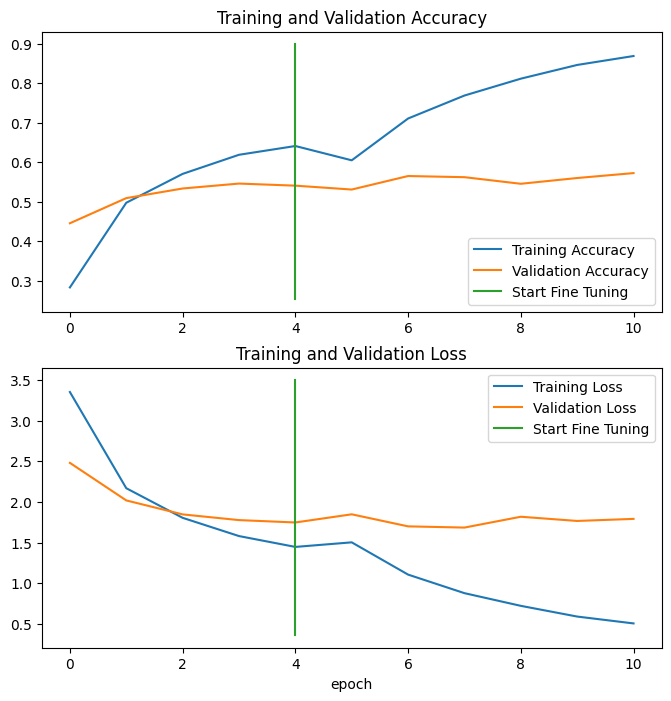

In [23]:
from types import new_class
compare_historys(original_history=history_all_classes_10_percent,new_history=history_all_classes_10_percent_fine_tuned,initial_epochs=5)

Save and Load Model

In [24]:
model_paths="/content/drive/MyDrive/deep_learning_models"
model.save(filepath=model_paths+"/"+"fine_tuned_model_all_data_10_percent.h5")

In [25]:
# Define the custom objects dictionary
custom_objects = {"RandomHeight": tf.keras.layers.RandomHeight,
                  "RandomWidth": tf.keras.layers.RandomWidth,
                  "RandomRotation": tf.keras.layers.RandomRotation,
                  "RandomFlip": tf.keras.layers.RandomFlip}

# Load the model with custom objects
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/deep_learning_models/fine_tuned_model_all_data_10_percent.h5",
                                        custom_objects=custom_objects)

loaded_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_layer         │ (None, None, None, 3)  │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Global_Average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,954 (15.94 MB)

 Trainable params: 910,821 (3.47 MB)

 Non-trainable params: 3,268,131 (12.47 MB)

 Optimizer params: 2 (12.00 B)

In [26]:
loaded_model_results=loaded_model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - accuracy: 0.4895 - loss: 2.1836


Evaluating model performance accross differnt classes

In [27]:
import tensorflow as tf

In [28]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

--2025-10-01 13:09:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip’

custom_food_images. 100%[===================>]  12.58M  81.1MB/s    in 0.2s    

2025-10-01 13:09:46 (81.1 MB/s) - ‘custom_food_images.zip’ saved [13192985/13192985]



Making predictions with our trained_model

In [29]:
pred_probs=model.predict(test_data,verbose=1)

790/790 ━━━━━━━━━━━━━━━━━━━━ 64s 78ms/step


In [30]:
pred_probs

array([[2.34249398e-01, 4.42629134e-05, 3.19534652e-02, ...,
        2.98868849e-06, 5.77141484e-03, 1.76013932e-02],
       [9.86038685e-01, 3.09123616e-09, 7.97002169e-04, ...,
        1.07042157e-04, 4.95389934e-08, 1.55378146e-07],
       [6.50919020e-01, 4.24441096e-04, 2.27752631e-03, ...,
        1.80850315e-04, 4.22148965e-04, 8.60367145e-04],
       ...,
       [1.00098354e-04, 1.07661961e-02, 2.67830671e-07, ...,
        1.35591708e-03, 5.56387415e-04, 2.61822522e-01],
       [7.95207219e-04, 6.35203347e-03, 1.23448204e-04, ...,
        2.73323181e-04, 1.22688958e-04, 2.45922580e-01],
       [1.79135185e-02, 1.26962166e-03, 4.83251689e-03, ...,
        3.13930050e-03, 1.18013122e-03, 5.67411005e-01]], dtype=float32)

In [31]:
len(pred_probs)

25250

In [32]:
pred_probs.shape

(25250, 101)

In [33]:
pred_probs[0]

array([2.34249398e-01, 4.42629134e-05, 3.19534652e-02, 1.08082979e-07,
       3.92541239e-07, 3.76439488e-07, 5.12322513e-05, 5.68783548e-07,
       4.61890874e-03, 1.74094399e-04, 2.08930010e-06, 2.33806134e-07,
       5.77689898e-05, 3.30044827e-07, 7.17921721e-05, 1.55595215e-02,
       2.43607474e-06, 6.68362190e-05, 1.45320624e-01, 8.01646092e-05,
       1.72767858e-03, 5.45272223e-06, 2.05429940e-04, 1.13224043e-04,
       5.06033050e-03, 1.30811532e-04, 3.83261096e-04, 1.32006971e-04,
       1.23072427e-03, 6.60574005e-04, 2.51716983e-06, 1.97227416e-03,
       9.97707131e-04, 4.75119523e-05, 1.44846365e-02, 1.99404167e-05,
       2.31265440e-05, 2.06897457e-04, 2.18359032e-03, 1.84560078e-04,
       1.61575608e-05, 6.55746274e-03, 1.98785365e-05, 1.60168682e-04,
       2.45622767e-04, 4.22345009e-04, 1.15938477e-04, 4.68238140e-05,
       5.81640006e-06, 3.25623937e-02, 3.82912767e-05, 3.03769135e-04,
       3.16916496e-01, 1.08786756e-02, 5.37333312e-04, 2.07747635e-03,
      

In [34]:
len(pred_probs[0])

101

In [35]:
sum(pred_probs[0])

np.float32(1.0000001)

In [36]:
tf.argmax(pred_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=52>

In [37]:
test_data.class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [38]:
test_data.class_names[52]

'gyoza'

In [39]:
# Get predicted classes of each label
pred_classes=pred_probs.argmax(axis=1)
pred_classes[:10]

array([52,  0,  0, 38,  8,  8, 29, 58,  2, 41])

In [40]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

In [41]:
len(test_data)   # return number of batches

790

To get our test labels we need ti unravel our test_data batchdataset

In [42]:
y_labels=[]
for images ,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

In [43]:
loaded_model_results

[2.019679307937622, 0.5192078948020935]

Evaluating our models predictions

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
sklearn_accuracy=accuracy_score(y_true=y_labels,y_pred=pred_classes)

In [46]:
sklearn_accuracy

0.6129108910891089

Lets now visualize (Make Confusion Matrix)

In [47]:
from helper_functions import make_confusion_matrix

In [48]:
class_names=test_data.class_names

In [49]:
make_confusion_matrix(y_true=y_labels,y_pred=pred_classes,classes=class_names,figsize=(100,100),text_size=(20))

Lets create classification report

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_labels,pred_classes))

              precision    recall  f1-score   support

           0       0.38      0.17      0.23       250
           1       0.58      0.73      0.64       250
           2       0.74      0.61      0.67       250
           3       0.75      0.60      0.67       250
           4       0.74      0.28      0.41       250
           5       0.71      0.30      0.43       250
           6       0.62      0.84      0.72       250
           7       0.88      0.80      0.83       250
           8       0.25      0.66      0.36       250
           9       0.34      0.68      0.45       250
          10       0.51      0.48      0.49       250
          11       0.81      0.65      0.72       250
          12       0.74      0.64      0.69       250
          13       0.47      0.66      0.55       250
          14       0.68      0.52      0.59       250
          15       0.38      0.42      0.40       250
          16       0.72      0.62      0.66       250
          17       0.33    

Creating a Dictionary of classification report

In [51]:
classification_report_dict=classification_report(y_labels,pred_classes,output_dict=True)

In [52]:
# Create Empty Dictinary first
class_f1_scores={}

for k,v in classification_report_dict.items():
   if k == 'accuracy':
    break
   else:
      class_f1_scores[class_names[int(k)]]=v['f1-score']
class_f1_scores

{'apple_pie': 0.23333333333333334,
 'baby_back_ribs': 0.6443661971830986,
 'baklava': 0.6681318681318681,
 'beef_carpaccio': 0.6696230598669624,
 'beef_tartare': 0.4069767441860465,
 'beet_salad': 0.4257703081232493,
 'beignets': 0.717687074829932,
 'bibimbap': 0.8343815513626834,
 'bread_pudding': 0.3572984749455338,
 'breakfast_burrito': 0.449468085106383,
 'bruschetta': 0.49072164948453606,
 'caesar_salad': 0.7216035634743875,
 'cannoli': 0.6881720430107527,
 'caprese_salad': 0.5524126455906821,
 'carrot_cake': 0.5863636363636363,
 'ceviche': 0.3961904761904762,
 'cheese_plate': 0.6637931034482759,
 'cheesecake': 0.41874084919472915,
 'chicken_curry': 0.44481054365733114,
 'chicken_quesadilla': 0.5849462365591398,
 'chicken_wings': 0.6858316221765913,
 'chocolate_cake': 0.4507042253521127,
 'chocolate_mousse': 0.3850267379679144,
 'churros': 0.7086956521739131,
 'clam_chowder': 0.6815415821501014,
 'club_sandwich': 0.7246963562753036,
 'crab_cakes': 0.36666666666666664,
 'creme_brul

In [53]:
# Turn f1 scores into dataframe visulzization
import pandas as pd

f1_score_df= pd.DataFrame({
    'class_names': list(class_f1_scores.keys()),
    "f1-score": list(class_f1_scores.values())
}).sort_values('f1-score', ascending=False)

display(f1_score_df)

,class_names,f1-score
33,edamame,0.972332
63,macarons,0.890756
75,pho,0.869023
69,oysters,0.853119
91,spaghetti_carbonara,0.846004
...,...,...
82,ravioli,0.332117
87,scallops,0.331081
77,pork_chop,0.311111
50,grilled_salmon,0.300319


# **Plot F1-Scores**

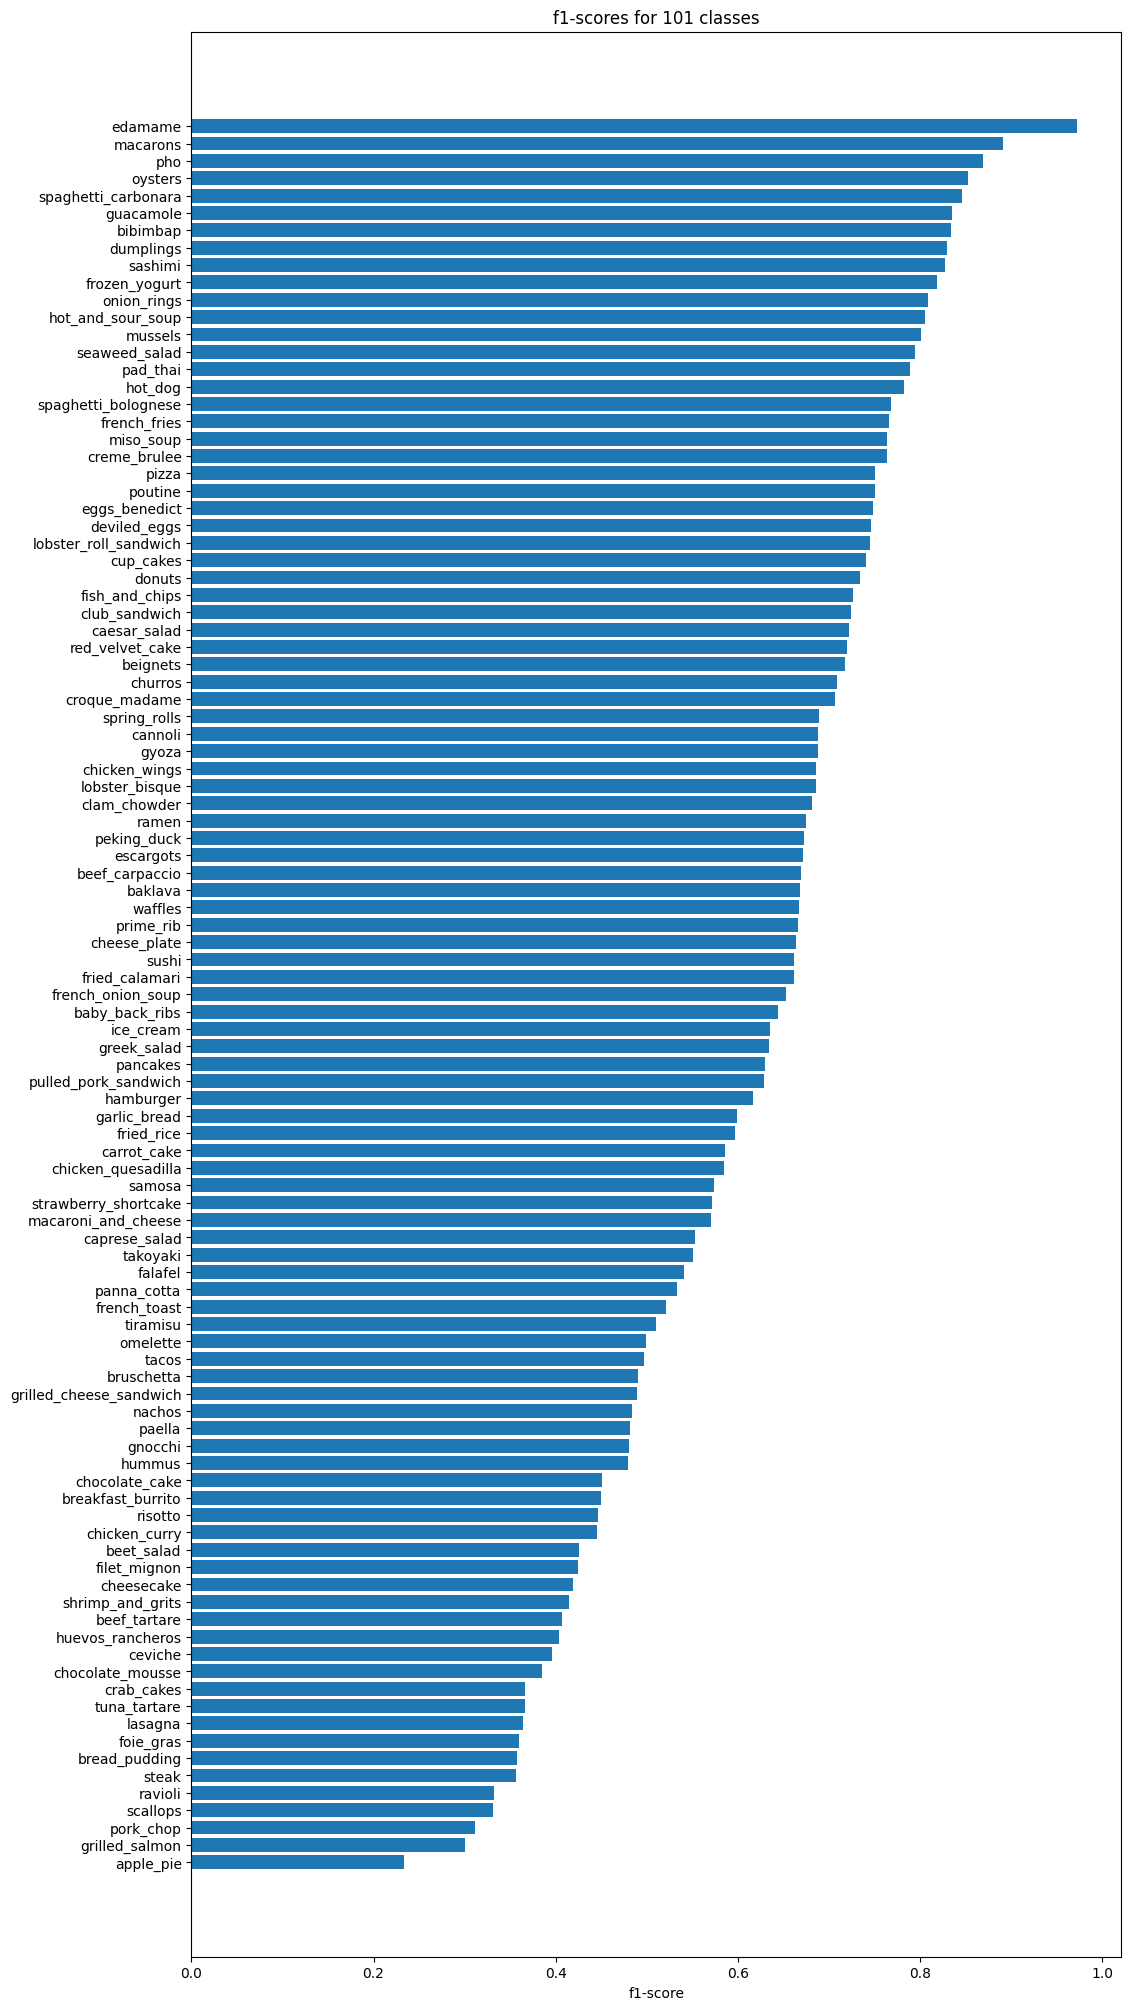

In [54]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(12,25))
scores=ax.barh(range(len(f1_score_df)),f1_score_df['f1-score'].values)
ax.set_yticks(range(len(f1_score_df)))
ax.set_yticklabels(f1_score_df['class_names'])
ax.set_xlabel('f1-score')
ax.set_title('f1-scores for 101 classes')
ax.invert_yaxis()

# **Visualzize predictions on custom images**

In [55]:
def load_and_prep_image(filename,img_shape=224,scale=True):
    img=tf.io.read_file(filename)
    img=tf.io.decode_image(img)
    img=tf.image.resize(img,[img_shape,img_shape])

    if scale:
       return img/255.
    else:
       return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


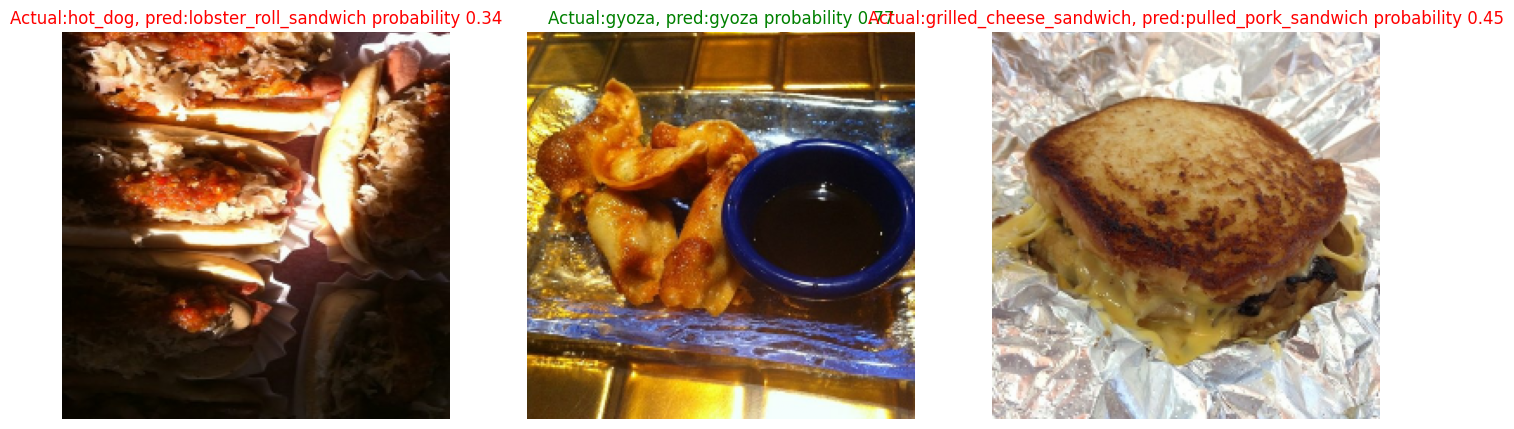

In [56]:
import os
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(17,10))
for i in range(3):
    class_name=random.choice(class_names)
    file_name=random.choice(os.listdir(test_dir+'/'+class_name))
    # Fix: Correct the file path to include the class_name directory
    file_path=test_dir+'/'+class_name+'/'+file_name
    # Load and make prediction
    img=load_and_prep_image(file_path,scale=False)
    pred_probs=model.predict(tf.expand_dims(img,axis=0))
    pred_class=class_names[pred_probs.argmax()]

    # Plot Images
    plt.subplot(1,3,i+1)
    plt.imshow(img/255.)
    if class_name==pred_class:
       title_color='g'
    else:
       title_color='r'
    plt.title(f'Actual:{class_name}, pred:{pred_class} probability {pred_probs.max():.2f}',c=title_color)
    plt.axis(False)

***Finding the most wrong predictions***

In [57]:
# Get all of the image filepaths in the test datasets
filepaths=[]
for filepath in test_data.list_files('101_food_classes_10_percent/test/*/*.jpg',shuffle=False):
    filepaths.append(filepath.numpy())
filepaths[:10]

[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [1]:
import pandas as pd
import numpy as np

filepaths = []
y_labels = []
y_preds = []
y_conf = []

for batch in test_data:   # batched dataset
    images, labels = batch
    probs = model.predict(images, verbose=0)   # predict batch
    preds = np.argmax(probs, axis=1)

    for i in range(len(images)):
        filepaths.append("N/A")  # replace with actual paths if needed
        y_labels.append(np.argmax(labels[i].numpy()))
        y_preds.append(preds[i])
        y_conf.append(np.max(probs[i]))

pred_df = pd.DataFrame({
    "y_true": y_labels,
    "y_pred": y_preds,
    "pred_conf": y_conf
})


NameError: name 'model' is not defined